<a href="https://colab.research.google.com/github/AbhilashDatta/LITS/blob/main/SNGAN_for_LITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.flush_and_unmount()

Mounted at /content/gdrive


In [3]:
!pip install medpy --upgrade --q

     |████████████████████████████████| 151 kB 9.0 MB/s 
     |████████████████████████████████| 48.4 MB 56 kB/s 


In [4]:
from medpy.io import load, save
import os
import os.path
import gc
from scipy.ndimage import zoom
import numpy as np
from tqdm.auto import tqdm
from multiprocessing import Pool

try:
  os.mkdir('data')
except:
  pass

def generate_batch_1(file):
    shape=64/2
    
    if 'total-'+str(file) in os.listdir('data'):
        return

    img, img_header = load('/content/gdrive/MyDrive/Training Batch 1/volume-'+str(file)+'.nii')
    seg, img_header = load('/content/gdrive/MyDrive/Training Batch 1/segmentation-'+str(file)+'.nii')
        
    arr=np.where(seg==2)[-1]
    arr=np.where(seg==2)[-1]
    if len(arr)==0:
        arr = np.asarray([0,img.shape[-1]])

    mn=(arr.min()+arr.max())/2

    if mn-shape<0:
        start=0
        end=int(shape*2)
    elif mn+shape>img.shape[-1]:
        end=int(img.shape[-1])
        start=int(end-shape*2)
    else:
        start=int(max(0,(mn-shape)))
        end=int(min(img.shape[-1],int(mn+shape)))
    
    img=img[:,:,start:end]
    img[img < -250] = -250
    img[img > 250] = 250
    img=(img+250)/500
    img = np.array(img, dtype='float32')

    # seg=seg.astype('float64')
    # seg/=2
    # seg = np.array(seg, dtype='float32')
    # seg=seg[:,:,start:end]

    # total=np.concatenate([img,seg],-1)
    # print(total.shape)
    np.save( "/content/data/total-" + str(file),img)
    print('Saving ',file)
    # del([seg,img,total])
    del([img,seg])
    gc.collect()

pool = Pool()
generate = pool.map(generate_batch_1, range(28))      


Saving  0
Saving  1
Saving  2
Saving  6
Saving  4
Saving  8
Saving  3
Saving  7
Saving  5
Saving  9
Saving  12
Saving  10
Saving  14
Saving  16
Saving  11
Saving  15
Saving  13
Saving  22
Saving  17
Saving  20
Saving  23
Saving  18
Saving  24
Saving  21
Saving  26
Saving  19
Saving  25
Saving  27


In [5]:
def generate_batch_2(file):

    if 'total-'+str(file) in os.listdir('data'):
        return

    shape=64/2
    img, img_header = load('/content/gdrive/MyDrive/Training Batch 2/volume-'+str(file)+'.nii')
    seg, img_header = load('/content/gdrive/MyDrive/Training Batch 2/segmentation-'+str(file)+'.nii')
     
    arr=np.where(seg==2)[-1]
    if len(arr)==0:
        arr = np.asarray([0,img.shape[-1]])

    mn=(arr.min()+arr.max())/2

    # if mn-shape<0:
    #     start=0
    #     end=int(shape*2)
    # elif mn+shape>img.shape[-1]:
    #     end=int(img.shape[-1])
    #     start=int(end-shape*2)
    # else:
    #     start=int(max(0,(mn-shape)))
    #     end=int(min(img.shape[-1],int(mn+shape)))
    start = 0
    end = 64
    img=img[:,:,start:end]
    img[img < -250] = -250
    img[img > 250] = 250
    img=(img+250)/500
    img = np.array(img, dtype='float32')

    # seg=seg.astype('float64')
    # seg/=2
    # seg = np.array(seg, dtype='float32')
    # seg=seg[:,:,start:end]

    # total=np.concatenate([img,seg],-1)
    # print(img.shape)
    np.save( "/content/data/total-" + str(file),img)
    print('Saving ',file)
    # del([seg,img,total])
    del([img,seg])
    gc.collect()

pool = Pool()
generate = pool.map(generate_batch_2, range(28,131))

Saving  42
Saving  35
Saving  28
Saving  49
Saving  43
Saving  36
Saving  29
Saving  50
Saving  44
Saving  37
Saving  45
Saving  30
Saving  51
Saving  38
Saving  31
Saving  46
Saving  52
Saving  32
Saving  39
Saving  47
Saving  53
Saving  33
Saving  40
Saving  48
Saving  34
Saving  54
Saving  41
Saving  56
Saving  63
Saving  55
Saving  70
Saving  64
Saving  77
Saving  57
Saving  71
Saving  58
Saving  72
Saving  78
Saving  65
Saving  59
Saving  66
Saving  73
Saving  79
Saving  60
Saving  67
Saving  74
Saving  61
Saving  75
Saving  62
Saving  80
Saving  76
Saving  68
Saving  84
Saving  81
Saving  69
Saving  91
Saving  85
Saving  98
Saving  92
Saving  86
Saving  82
Saving  99
Saving  93
Saving  100
Saving  83
Saving  87
Saving  94
Saving  101
Saving  88
Saving  105
Saving  95
Saving  102
Saving  106
Saving  89
Saving  96
Saving  103
Saving  107
Saving  90
Saving  97
Saving  104
Saving  126
Saving  119
Saving  112
Saving  108
Saving  120
Saving  113
Saving  127
Saving  109
Saving  121
Savi

In [6]:
!nvidia-smi

Fri Aug 27 06:42:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%pylab inline
import numpy as np
import torch
import os
from medpy.io import load
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch import autograd
from torch.autograd import Variable
import nibabel as nib
from torch.utils.data.dataset import Dataset
from torch.utils.data import dataloader
import csv
import numpy as np
import torch
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from skimage.transform import resize
from medpy.io import *
import glob


class LITSdataset(Dataset):
  def __init__(self,range, augmentation=False):
    self.augmentation = augmentation
    self.name = []
    self.range=range
    for data in self.range:
    	self.name.append('/content/data/total-'+str(data)+'.npy')
    # self.name = vol_images
    self.name = np.asarray(self.name)

  def __len__(self):
  	return len(self.name)

  def __getitem__(self, index):
    path = self.name[index]
    img = np.load(path)

    # img = np.flip(img,1)
    sp_size = 64
    img = resize(img, (sp_size,sp_size,sp_size), mode='constant')
  	
    # if self.augmentation:
    #   random_n = torch.rand(1)
    #   if random_n[0] > 0.5:
    #     img = np.flip(img,0)
    
    img = np.ascontiguousarray(img,dtype=np.float32)
    imageout = torch.from_numpy(img).float().view(1,sp_size,sp_size,sp_size)
    # imageout = imageout*2-1

    return imageout


Populating the interactive namespace from numpy and matplotlib


In [3]:
#hyper-parameters

BATCH_SIZE = 20
gpu = True
workers = 2

LAMBDA= 10
#setting latent variable sizes
latent_dim = 10

In [4]:
import numpy as np
import torch
import os
from torch import nn
from torch import optim
from torch.nn import functional as F

class Discriminator(nn.Module):
    def __init__(self, channel=512):
        super(Discriminator, self).__init__()        
        self.channel = channel
        n_class = 1
        
        self.conv1 = nn.utils.spectral_norm(nn.Conv3d(1, channel//8, kernel_size=4, stride=2, padding=1))
        self.conv2 = nn.utils.spectral_norm(nn.Conv3d(channel//8, channel//4, kernel_size=4, stride=2, padding=1))
        self.bn2 = nn.BatchNorm3d(channel//4)
        self.conv3 = nn.utils.spectral_norm(nn.Conv3d(channel//4, channel//2, kernel_size=4, stride=2, padding=1))
        self.bn3 = nn.BatchNorm3d(channel//2)
        self.conv4 = nn.utils.spectral_norm(nn.Conv3d(channel//2, channel, kernel_size=4, stride=2, padding=1))
        self.bn4 = nn.BatchNorm3d(channel)     
        self.conv5 = nn.utils.spectral_norm(nn.Conv3d(channel, n_class, kernel_size=4, stride=2, padding=1))
        
    def forward(self, x, _return_activations=False):
        h1 = F.leaky_relu(self.conv1(x), negative_slope=0.2)
        h2 = F.leaky_relu(self.bn2(self.conv2(h1)), negative_slope=0.2)
        h3 = F.leaky_relu(self.bn3(self.conv3(h2)), negative_slope=0.2)
        h4 = F.leaky_relu(self.bn4(self.conv4(h3)), negative_slope=0.2)
        h5 = self.conv5(h4)
        output = h5

        return output

class Generator(nn.Module):
    def __init__(self, noise:int=10, channel:int=64):
        super(Generator, self).__init__()
        _c = channel
        
        self.noise = noise
        self.fc = nn.Linear(10,512*4*4*4)
        self.fc.requires_grad_ = False #
        self.bn1 = nn.BatchNorm3d(_c*8)
        self.bn1.requires_grad_ = False #
        
        self.tp_conv2 = nn.Conv3d(_c*8, _c*4, kernel_size=3, stride=1, padding=1, bias=False)
        self.tp_conv2.requires_grad_ = True #
        self.bn2 = nn.BatchNorm3d(_c*4)
        self.bn2.requires_grad_ = False #
        
        self.tp_conv3 = nn.Conv3d(_c*4, _c*2, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn3 = nn.BatchNorm3d(_c*2)
        
        self.tp_conv4 = nn.Conv3d(_c*2, _c, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn4 = nn.BatchNorm3d(_c)
        
        self.tp_conv5 = nn.Conv3d(_c, 1, kernel_size=3, stride=1, padding=1, bias=False)


    def forward(self, noise):
        noise = noise.view(-1, 10)
        h = self.fc(noise)
        h = h.view(-1,512,4,4,4)
        h = F.relu(self.bn1(h))

        h = F.interpolate(h,scale_factor = 2)
        h = self.tp_conv2(h)
        h = F.relu(self.bn2(h))
        
        h = F.interpolate(h,scale_factor = 2)
        h = self.tp_conv3(h)
        h = F.relu(self.bn3(h))

        h = F.interpolate(h,scale_factor = 2)
        h = self.tp_conv4(h)
        h = F.relu(self.bn4(h))

        h = F.interpolate(h,scale_factor = 2)
        h = self.tp_conv5(h)

        h = torch.tanh(h)
        return h

print(Generator())
print(Discriminator())

def inf_train_gen(data_loader):
    while True:
        for _,images in enumerate(data_loader):
            yield images

Generator(
  (fc): Linear(in_features=10, out_features=32768, bias=True)
  (bn1): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tp_conv2): Conv3d(512, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (bn2): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tp_conv3): Conv3d(256, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (bn3): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tp_conv4): Conv3d(128, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (bn4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tp_conv5): Conv3d(64, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
)
Discriminator(
  (conv1): Conv3d(1, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  (conv2): Conv3d(64, 128, kernel_size=(4, 4, 4), stride=(

In [5]:
trainset1 = LITSdataset(list(range(131)),augmentation=True)
train_loader1 = torch.utils.data.DataLoader(trainset1,batch_size=BATCH_SIZE,
                                          shuffle=True,num_workers=workers)
# trainset2 = LITSdataset(list(range(65,131)),augmentation=True)
# train_loader2 = torch.utils.data.DataLoader(trainset2,batch_size=BATCH_SIZE,
#                                           shuffle=True,num_workers=workers)

In [ ]:
# Create New Instances of Generator & Discriminator

from torch import nn

D1 = Discriminator().cuda()
G1 = Generator().cuda()

def weights_init(m):
    if isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose3d):
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
    if isinstance(m, nn.BatchNorm3d):
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

G1 = G1.apply(weights_init)
D1 = D1.apply(weights_init)

g_optimizer1 = optim.Adam(G1.parameters(), lr=0.0005)
d_optimizer1 = optim.Adam(D1.parameters(), lr=0.0005)

# g_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(g_optimizer1, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)
# d_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(d_optimizer1, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)

real_y = Variable(torch.ones((BATCH_SIZE, 1)).cuda())
fake_y = Variable(torch.zeros((BATCH_SIZE, 1)).cuda())
loss_f = nn.BCEWithLogitsLoss()

In [6]:
# Loading Existing weights

D1 = Discriminator().cuda()
G1 = Generator().cuda()

d=torch.load('/content/gdrive/MyDrive/discriminator.pth',map_location='cuda:0')
g=torch.load('/content/gdrive/MyDrive/generator.pth',map_location='cuda:0')

G1.load_state_dict(g['model_state_dict'])
D1.load_state_dict(d['model_state_dict'])

g_optimizer1 = optim.Adam(G1.parameters(), lr=0.0001)
d_optimizer1 = optim.Adam(D1.parameters(), lr=0.0002)

# def weights_init(m):
#     if isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose3d):
#         torch.nn.init.normal_(m.weight, 0.5, 0.02)
#     if isinstance(m, nn.BatchNorm3d):
#         torch.nn.init.normal_(m.weight, 0.5, 0.02)
#         torch.nn.init.constant_(m.bias, 0)

# G1 = G1.apply(weights_init)
# D1 = D1.apply(weights_init)

# g_optimizer1.load_state_dict(g['optimizer_state_dict1'])
# d_optimizer1.load_state_dict(d['optimizer_state_dict1'])

g_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(g_optimizer1, mode='min', factor=0.1, patience=3, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)
d_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(d_optimizer1, mode='min', factor=0.1, patience=3, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)

loss_f = nn.BCEWithLogitsLoss()

torch.Size([20, 1, 64, 64, 64])


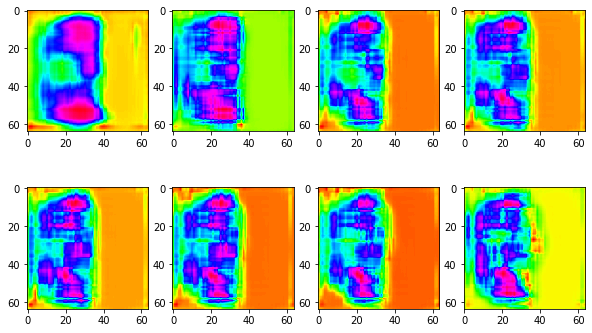

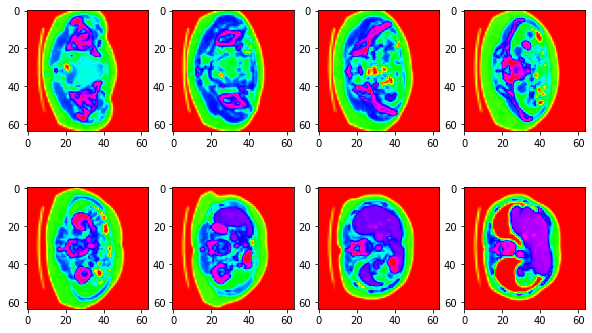

In [7]:
# visualization

def show_image(test_image):
    count = 1
    test_image = test_image.view(64,64,64)
    test_image = test_image.detach().to('cpu')
    plt.figure(figsize=(10,6))
    for i in range(64):
        if i%8==0:
            plt.subplot(2,4,count)
            count+=1
            plt.imshow(test_image[:,:,i], cmap='hsv')
            # plt.imshow(test_image[:,:,i], cmap='nipy_spectral')

    plt.show()

noise = Variable(torch.randn((BATCH_SIZE, latent_dim, 1, 1 ,1)).cuda())

# G = Generator().cuda()
# D = Discriminator().cuda()
fake_image = G1(noise)
print(fake_image.shape)
show_image(fake_image[0])
# y_fake_g = D1(fake_image)

real_image = trainset1[0]
show_image(real_image[0])

In [8]:
Ds=[D1]
Gs=[G1]
# train_loaders=[inf_train_gen(train_loader1)]
train_loaders = [train_loader1]
d_optimizers=[d_optimizer1]
g_optimizers=[g_optimizer1]

In [9]:
def get_noise(n_samples, z_dim, device='cuda'):
    return torch.randn(n_samples, z_dim, device = device)

def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
   
    noise = get_noise(num_images, z_dim, device)
    fakes = gen(noise)
    pred1 = disc(fakes.detach())
    F = torch.zeros_like(pred1)
    f_loss = criterion(pred1, F)
    pred2 = disc(real)
    T = torch.ones_like(pred2)
    r_loss = criterion(pred2, T)
    disc_loss = 0.5*(f_loss + r_loss)
    return disc_loss


def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
   
    noise = get_noise(num_images, z_dim, device)
    fakes = gen(noise)
    pred = disc(fakes)
    T = torch.ones_like(pred)
    gen_loss = criterion(pred, T)
  
    return gen_loss

In [10]:
def calc_gradient_penalty(netD, real_data, fake_data):    
    alpha = torch.rand(real_data.size(0),1,1,1,1)
    alpha = alpha.expand(real_data.size())
    alpha = alpha.cuda()
    interpolates = alpha * real_data + ((1 - alpha) * fake_data)
    interpolates = interpolates.cuda()
    interpolates = Variable(interpolates, requires_grad=True)


    disc_interpolates = netD(interpolates)
    gradients = autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                              grad_outputs=torch.ones(disc_interpolates.size()).cuda(),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * LAMBDA
    return gradient_penalty

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  1 | Loss = 0.06547224521636963
G Loss =  6.117456912994385 | D Loss = -4.808012008666992


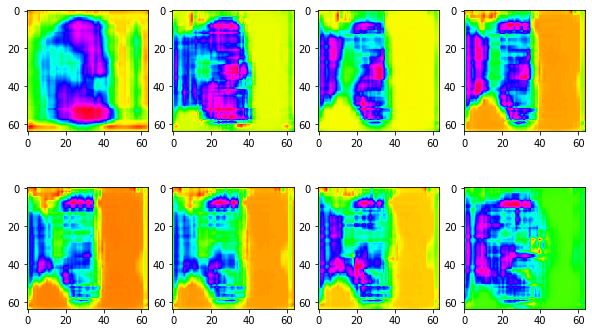

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  2 | Loss = -0.0031241178512573242
G Loss =  5.473461627960205 | D Loss = -5.535943984985352


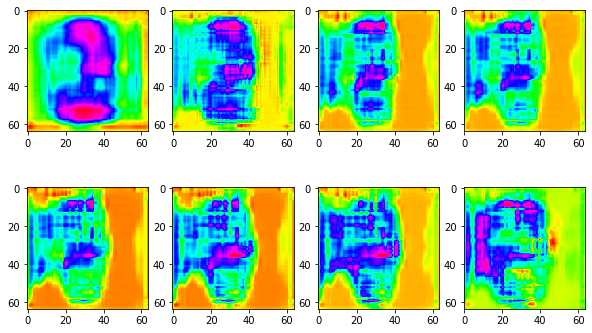

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  3 | Loss = 0.04389142990112305
G Loss =  5.527609825134277 | D Loss = -4.649781227111816


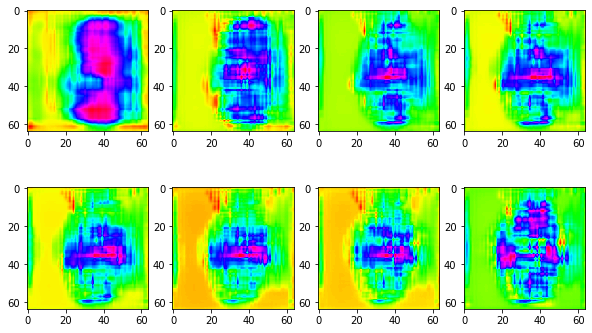

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  4 | Loss = 0.03272621631622315
G Loss =  5.965821266174316 | D Loss = -5.3112969398498535


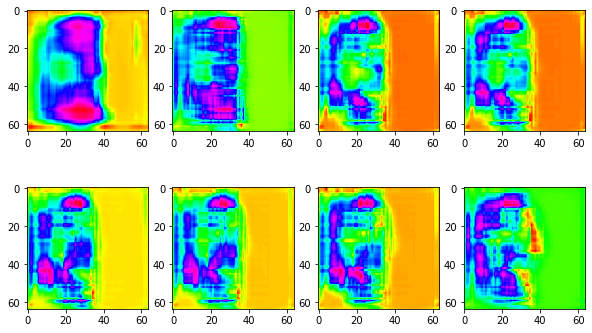

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  5 | Loss = 0.0735673189163208
G Loss =  6.076480865478516 | D Loss = -4.6051344871521


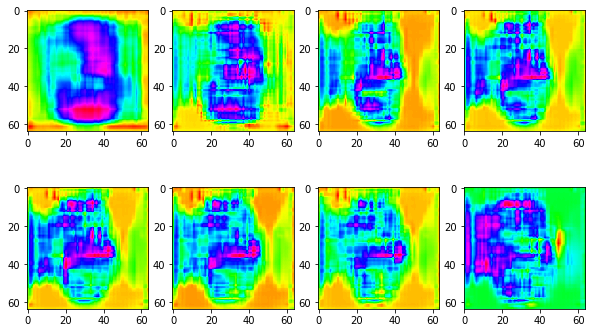

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  6 | Loss = 0.010342645645141601
G Loss =  6.191227436065674 | D Loss = -5.984374523162842


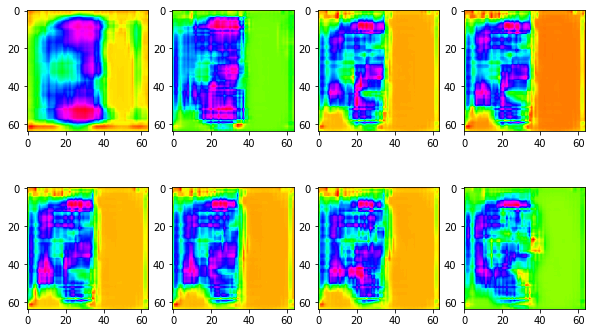

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  7 | Loss = 0.04386312961578369
G Loss =  5.762064456939697 | D Loss = -4.884801864624023


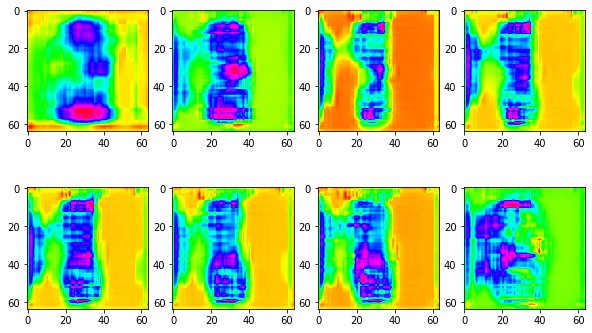

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  8 | Loss = 0.04804263114929199
G Loss =  5.844451904296875 | D Loss = -4.883599281311035


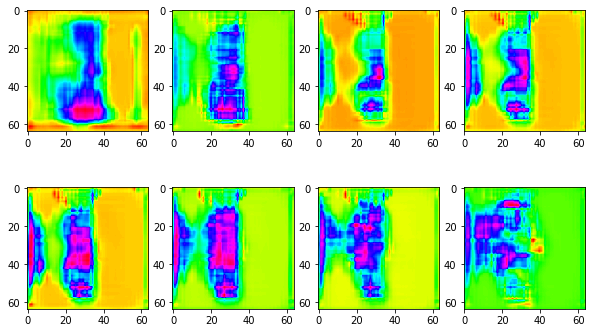

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  9 | Loss = 0.03651647567749024
G Loss =  6.12180757522583 | D Loss = -5.391478061676025


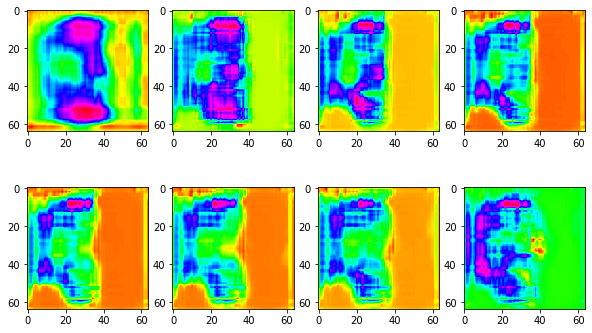

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:  10 | Loss = 0.034337973594665526
G Loss =  5.544398784637451 | D Loss = -4.857639312744141


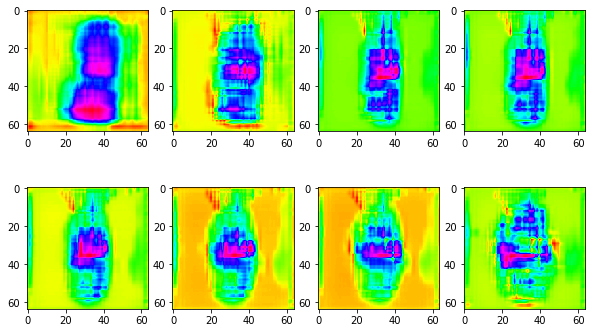

In [15]:
# Training Loop

import warnings
warnings.filterwarnings("ignore")

from tqdm.auto import tqdm
import torch.distributions as tdist

gen_loss_list = []
disc_loss_list = []
avg_loss = []
lst1 = []
lst0 = []

for epoch in range(10):
    for iteration, real_images in enumerate(tqdm(train_loaders[0])):
        sum = 0  
        for num in range(1):

            ###############################################
            # Updating Discriminator 
            ###############################################
            d_optimizer=d_optimizers[num]
            g_optimizer=g_optimizers[num]
            D=Ds[num]
            G=Gs[num]

            for p in D.parameters():  
                p.requires_grad = True 

            for _ in range(1):
                    
                d_optimizer.zero_grad()

                real_images = Variable(real_images).cuda()
                _batch_size = real_images.size(0)
                y_real_pred = D(real_images)
                d_real_loss = y_real_pred.mean()

                noise = Variable(torch.randn((_batch_size, latent_dim, 1, 1, 1)),volatile=True).cuda()
                fake_images = G(noise)
                y_fake_pred = D(fake_images.detach())

                d_fake_loss = y_fake_pred.mean()

                gradient_penalty = calc_gradient_penalty(D,real_images.data, fake_images.data)
            
                d_loss = d_fake_loss - d_real_loss + gradient_penalty
                # d_loss.backward()
                # Wasserstein_D = d_real_loss - d_fake_loss
                # disc_loss = get_disc_loss(G,D,loss_f,real_images, _batch_size,10, 'cuda')
                d_loss.backward(retain_graph=True)
                lst0.append(d_loss.item())
                d_optimizer.step()
                d_scheduler.step(d_loss)

            ###############################################
            # Updating Generator 
            ###############################################
            for p in D.parameters():
                p.requires_grad = False
                
            
            for iters in range(1):
                g_optimizer.zero_grad()

                noise = Variable(torch.randn((_batch_size, latent_dim, 1, 1 ,1)).cuda())
                fake_image =G(noise)
                y_fake_g = D(fake_image)

                g_loss = -y_fake_g.mean()
                # gen_loss = get_gen_loss(G, D, loss_f, _batch_size, 10, 'cuda')
                g_loss.backward(retain_graph=True)
                lst1.append(g_loss.item())
                g_optimizer.step()
                g_scheduler.step(g_loss)

        sum += np.mean(lst1) + np.mean(lst0)
        gen_loss_list.append(np.mean(lst1))
        disc_loss_list.append(np.mean(lst0))
        lst0 = []
        lst1 = []

    avg_loss.append(sum/BATCH_SIZE)
    print('Epoch: ',epoch+1,'| Loss =',avg_loss[-1])
    print('G Loss = ',gen_loss_list[-1],'| D Loss =',disc_loss_list[-1])
    noise = Variable(torch.randn((BATCH_SIZE, latent_dim, 1, 1 ,1)).cuda())
    fake_image = G(noise)
    show_image(fake_image[0])
    print()

    # if (epoch+1)%10==0:
    #     torch.save({
    #             'model_state_dict': G1.state_dict(),
    #             'optimizer_state_dict1': g_optimizer1.state_dict()
    #             # 'optimizer_state_dict2': g_optimizer2.state_dict()
    #             }, '/content/gdrive/MyDrive/generator'+'.pth')
    #     torch.save({
    #             'model_state_dict': D1.state_dict(),
    #             'optimizer_state_dict1': d_optimizer1.state_dict()
    #             # 'optimizer_state_dict2': d_optimizer2.state_dict()
    #             }, '/content/gdrive/MyDrive/discriminator'+'.pth')


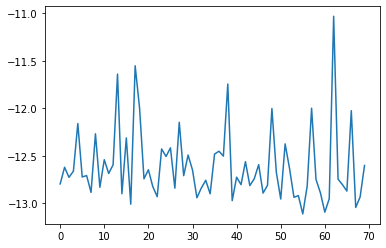

In [20]:
plt.plot(disc_loss_list)

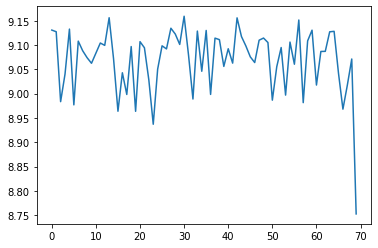

In [21]:
plt.plot(gen_loss_list)

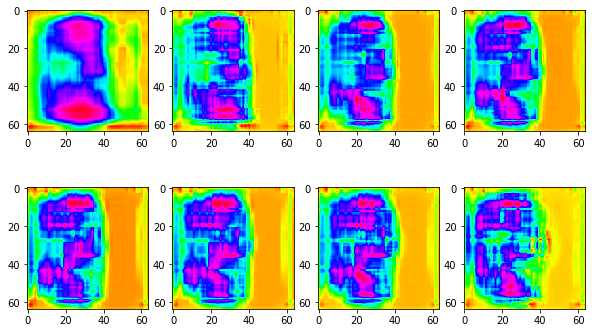

In [48]:
noise = Variable(torch.randn((BATCH_SIZE, latent_dim, 1, 1 ,1)).cuda())
fake_image = G1(noise)
show_image(fake_image[0])

In [51]:
torch.save({
        'model_state_dict': G1.state_dict(),
        'optimizer_state_dict1': g_optimizer1.state_dict()
        # 'optimizer_state_dict2': g_optimizer2.state_dict()
        }, '/content/gdrive/MyDrive/generator'+'.pth')
torch.save({
        'model_state_dict': D1.state_dict(),
        'optimizer_state_dict1': d_optimizer1.state_dict()
        # 'optimizer_state_dict2': d_optimizer2.state_dict()
        }, '/content/gdrive/MyDrive/discriminator'+'.pth')